# TATA Power
### Stock Analysis and Forecasting

## Business Objective

Predict the TATA Power Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2024 for TATA Power stock.

- Split the last year into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 30-Nov-2024.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link.

- https://finance.yahoo.com/quote/TATAPOWER.NS/

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Importing dataset
data=yf.download('TATAPOWER.NS', start='2015-1-1', end='2024-11-30')
tatapower = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [14]:
tatapower.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Date,,,,,,
2015-01-01 00:00:00+00:00,67.749840,82.150002,82.650002,81.949997,82.199997,938370
2015-01-02 00:00:00+00:00,68.739502,83.349998,83.750000,82.250000,82.250000,2387959
2015-01-05 00:00:00+00:00,68.327133,82.849998,84.599998,82.699997,84.099998,1932062
2015-01-06 00:00:00+00:00,65.688072,79.650002,82.300003,79.500000,82.000000,3509161
2015-01-07 00:00:00+00:00,64.533463,78.250000,80.199997,78.000000,79.500000,6050723
2015-01-08 00:00:00+00:00,65.976707,80.000000,80.400002,78.800003,78.800003,2131875
2015-01-09 00:00:00+00:00,65.811768,79.800003,80.800003,79.000000,80.800003,1628211
2015-01-12 00:00:00+00:00,66.224121,80.300003,80.550003,79.099998,79.650002,1152593


In [15]:
tatapower.tail(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Date,,,,,,
2024-11-14 00:00:00+00:00,404.649994,404.649994,411.850006,400.500000,401.950012,11063591
2024-11-18 00:00:00+00:00,404.700012,404.700012,410.899994,397.600006,408.000000,10703937
2024-11-19 00:00:00+00:00,408.100006,408.100006,417.799988,406.250000,406.250000,8869625
2024-11-21 00:00:00+00:00,408.049988,408.049988,413.399994,397.399994,411.500000,13362385
2024-11-22 00:00:00+00:00,413.750000,413.750000,416.899994,409.250000,414.899994,11165181
2024-11-25 00:00:00+00:00,412.350006,412.350006,423.450012,410.000000,421.450012,20232580
2024-11-26 00:00:00+00:00,410.299988,410.299988,415.399994,408.000000,413.899994,7286324
2024-11-27 00:00:00+00:00,417.649994,417.649994,418.500000,409.250000,411.799988,7869397


# EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [16]:
# Removing "Adj Close" columnfrom dataset
tatapower=tatapower.drop(["Adj Close"],axis=1)
tatapower

Price,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Date,,,,,
2015-01-01 00:00:00+00:00,82.150002,82.650002,81.949997,82.199997,938370
2015-01-02 00:00:00+00:00,83.349998,83.750000,82.250000,82.250000,2387959
2015-01-05 00:00:00+00:00,82.849998,84.599998,82.699997,84.099998,1932062
2015-01-06 00:00:00+00:00,79.650002,82.300003,79.500000,82.000000,3509161
2015-01-07 00:00:00+00:00,78.250000,80.199997,78.000000,79.500000,6050723
...,...,...,...,...,...
2024-11-25 00:00:00+00:00,412.350006,423.450012,410.000000,421.450012,20232580
2024-11-26 00:00:00+00:00,410.299988,415.399994,408.000000,413.899994,7286324


In [17]:
# Finding duplicate columns, if any
tatapower.duplicated().sum()

0

In [18]:
# Finding null values, if any
tatapower.isnull().sum()

,,0
Price,Ticker,
Close,TATAPOWER.NS,0
High,TATAPOWER.NS,0
Low,TATAPOWER.NS,0
Open,TATAPOWER.NS,0
Volume,TATAPOWER.NS,0


#### Discriptive Statistics

In [19]:
tatapower.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2446 entries, 2015-01-01 00:00:00+00:00 to 2024-11-29 00:00:00+00:00
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, TATAPOWER.NS)   2446 non-null   float64
 1   (High, TATAPOWER.NS)    2446 non-null   float64
 2   (Low, TATAPOWER.NS)     2446 non-null   float64
 3   (Open, TATAPOWER.NS)    2446 non-null   float64
 4   (Volume, TATAPOWER.NS)  2446 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 114.7 KB


In [20]:
tatapower.describe()

Price,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
count,2446.000000,2446.000000,2446.000000,2446.000000,2.446000e+03
mean,141.561611,143.784301,139.542498,141.858728,1.561404e+07
std,111.337496,113.003998,109.821587,111.613378,2.348741e+07
min,27.299999,28.600000,27.000000,27.250000,4.376310e+05
25%,69.699997,70.900002,68.599998,69.900002,4.134168e+06
50%,81.699997,82.699997,80.849998,82.000000,7.818570e+06
75%,218.149994,221.112495,215.387501,218.775002,1.798413e+07
max,485.500000,494.850006,479.399994,486.799988,3.606618e+08


In [21]:
tatapower.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Price,Ticker,,,,,
Close,TATAPOWER.NS,1.000000,0.999738,0.999747,0.999415,0.141798
High,TATAPOWER.NS,0.999738,1.000000,0.999510,0.999726,0.148511
Low,TATAPOWER.NS,0.999747,0.999510,1.000000,0.999586,0.131941
Open,TATAPOWER.NS,0.999415,0.999726,0.999586,1.000000,0.138122
Volume,TATAPOWER.NS,0.141798,0.148511,0.131941,0.138122,1.000000


- Every attributes are highly corelated except volume

### Visualizations

In [22]:
sns.set_style(style='darkgrid')

Text(0.5, 1.0, 'Low')

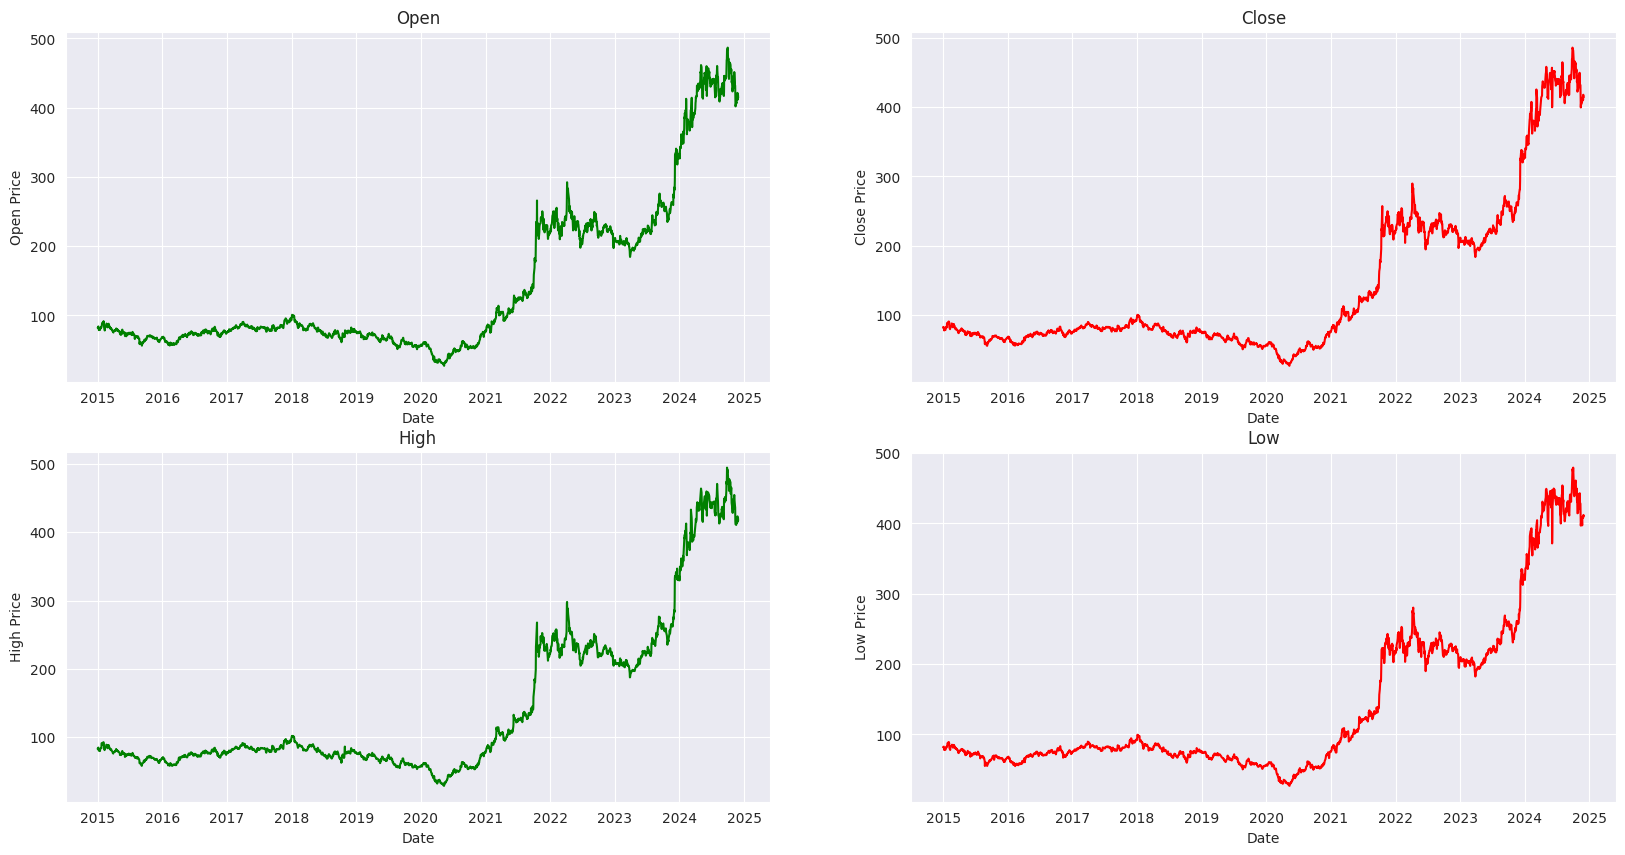

In [23]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(tatapower['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(tatapower['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(tatapower['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(tatapower['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

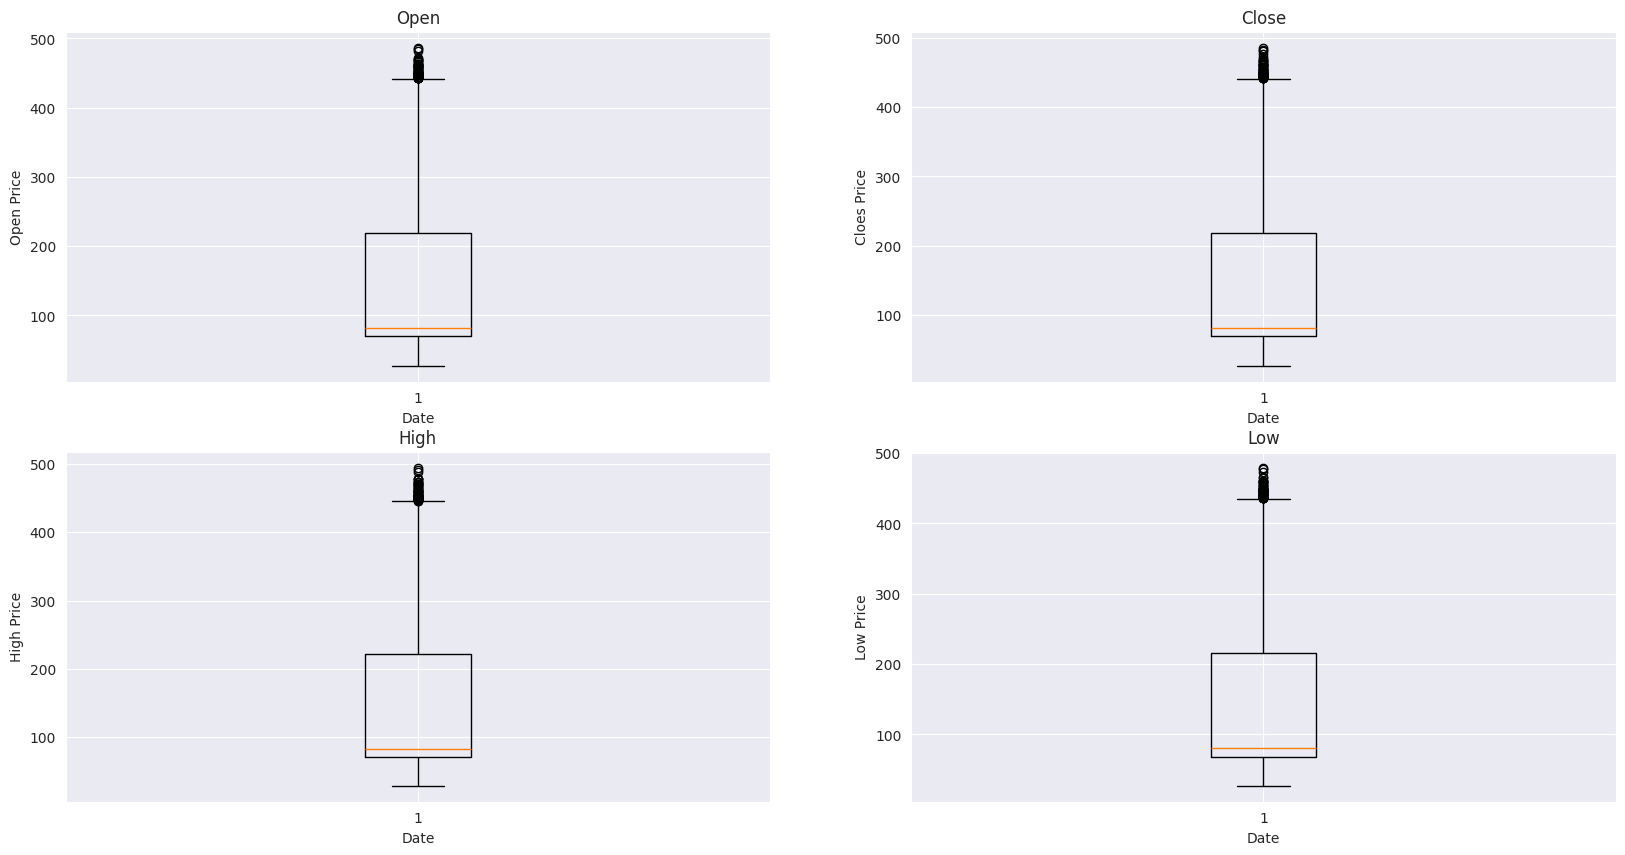

In [24]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(tatapower['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(tatapower['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(tatapower['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(tatapower['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is clear that there are no outliers inthe dataset

Text(0.5, 1.0, 'Low')

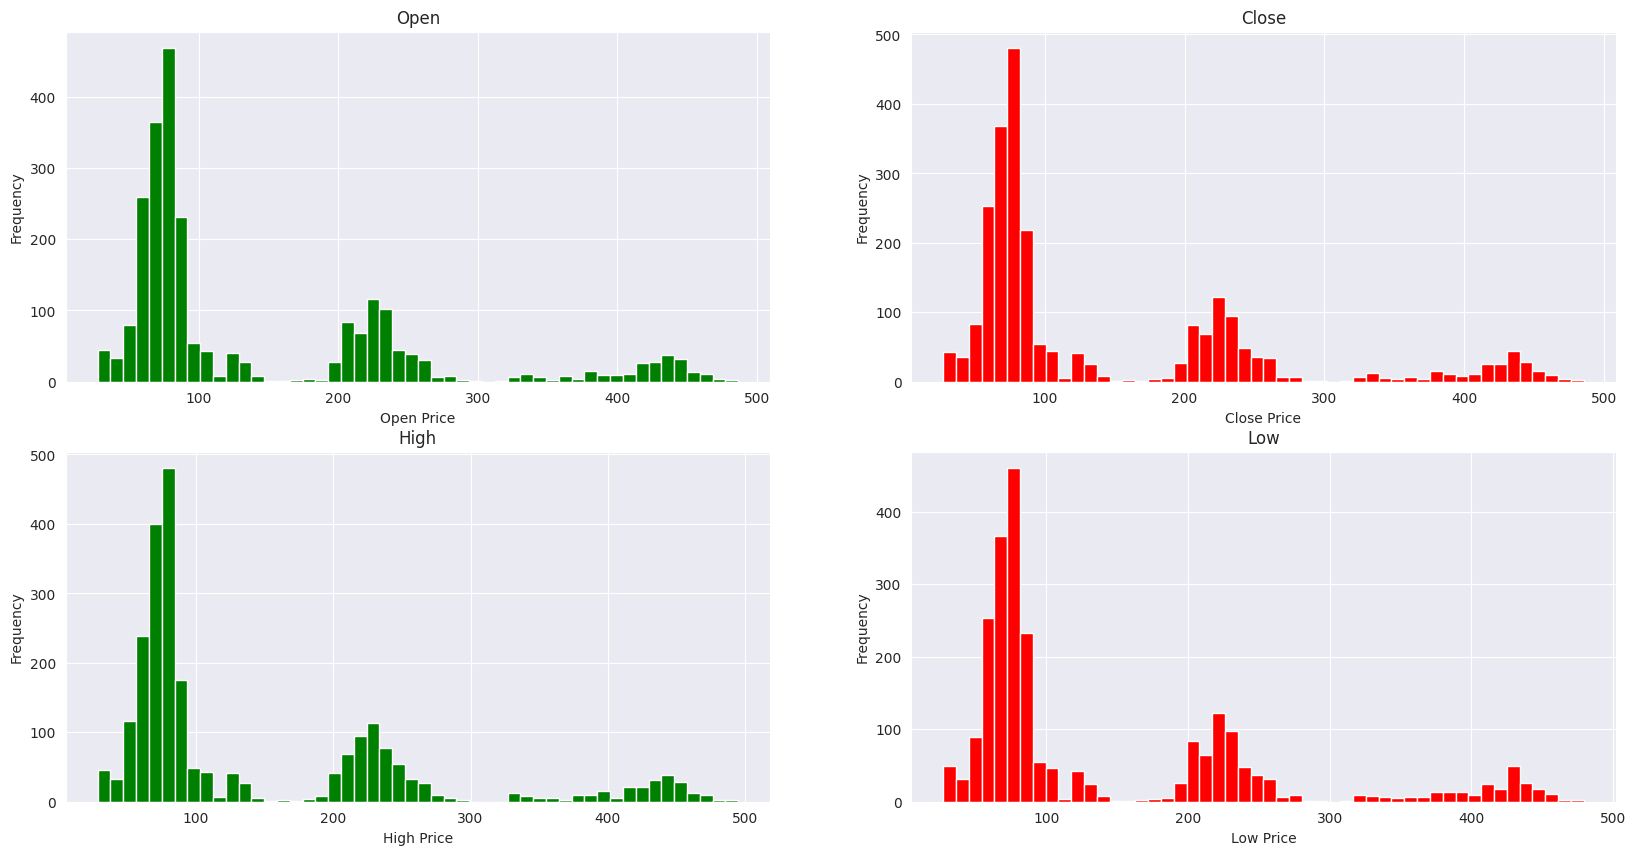

In [25]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(tatapower['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(tatapower['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(tatapower['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(tatapower['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

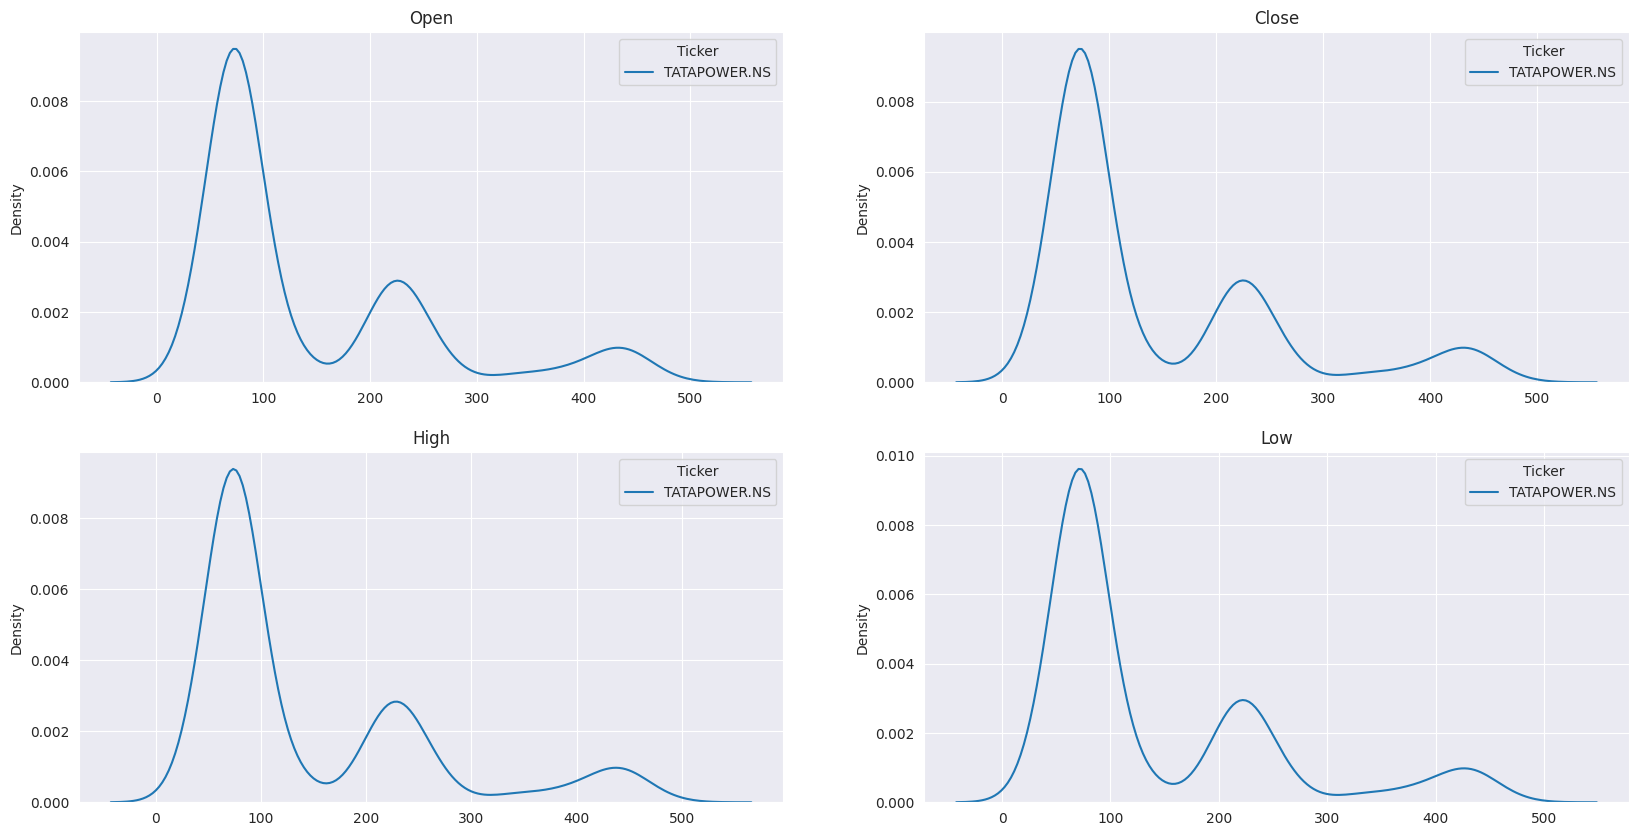

In [26]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(tatapower['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(tatapower['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(tatapower['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(tatapower['Low'], color='red')
plt.title('Low')

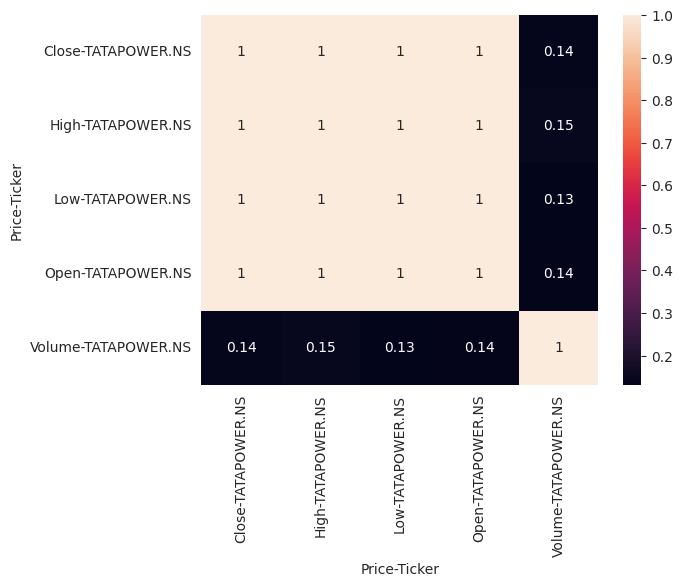

In [27]:
sns.heatmap(tatapower.corr(),annot=True)
plt.show()

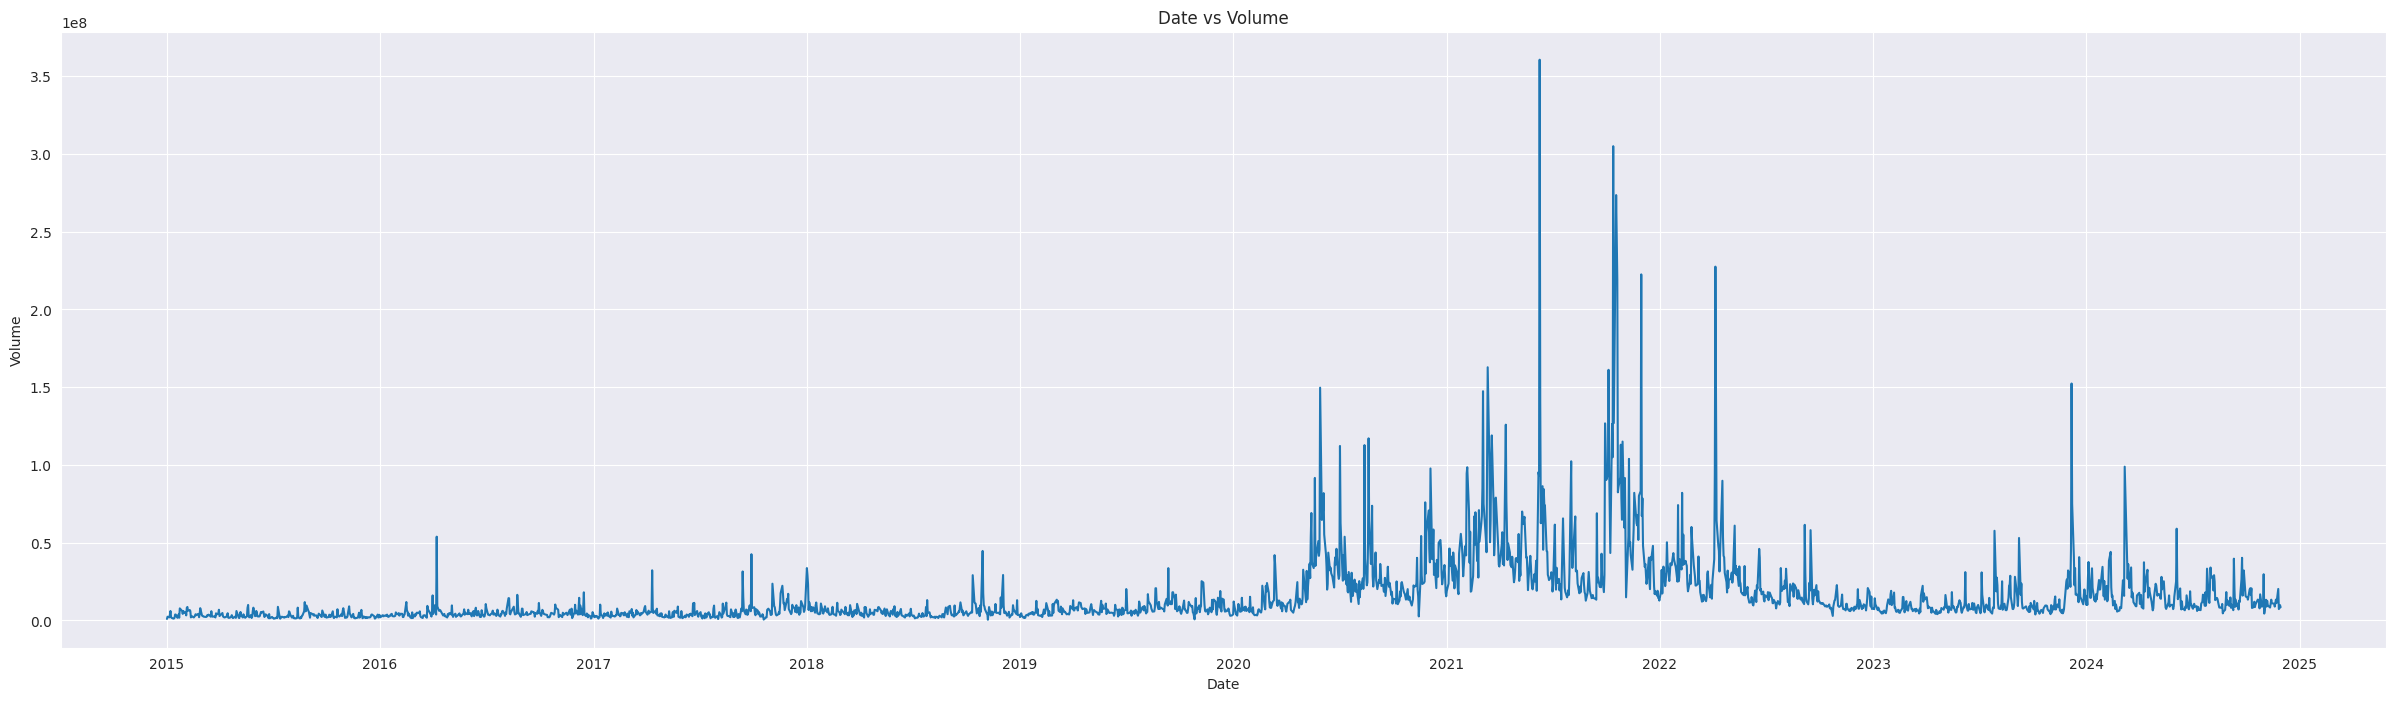

In [28]:
figure=plt.figure(figsize=(30,8))
plt.plot(tatapower['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

## Finding long-term and short-term trends

### Moving Average

In [29]:
tatapower_ma=tatapower.copy()
tatapower_ma['30-day MA']=tatapower['Close'].rolling(window=30).mean()
tatapower_ma['100-day MA']=tatapower['Close'].rolling(window=100).mean()

In [30]:
tatapower_ma

Price,Close,High,Low,Open,Volume,30-day MA,100-day MA
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,,
Date,,,,,,,
2015-01-01 00:00:00+00:00,82.150002,82.650002,81.949997,82.199997,938370,NaN,NaN
2015-01-02 00:00:00+00:00,83.349998,83.750000,82.250000,82.250000,2387959,NaN,NaN
2015-01-05 00:00:00+00:00,82.849998,84.599998,82.699997,84.099998,1932062,NaN,NaN
2015-01-06 00:00:00+00:00,79.650002,82.300003,79.500000,82.000000,3509161,NaN,NaN
2015-01-07 00:00:00+00:00,78.250000,80.199997,78.000000,79.500000,6050723,NaN,NaN
...,...,...,...,...,...,...,...
2024-11-25 00:00:00+00:00,412.350006,423.450012,410.000000,421.450012,20232580,432.963333,436.6570
2024-11-26 00:00:00+00:00,410.299988,415.399994,408.000000,413.899994,7286324,431.268333,436.4325


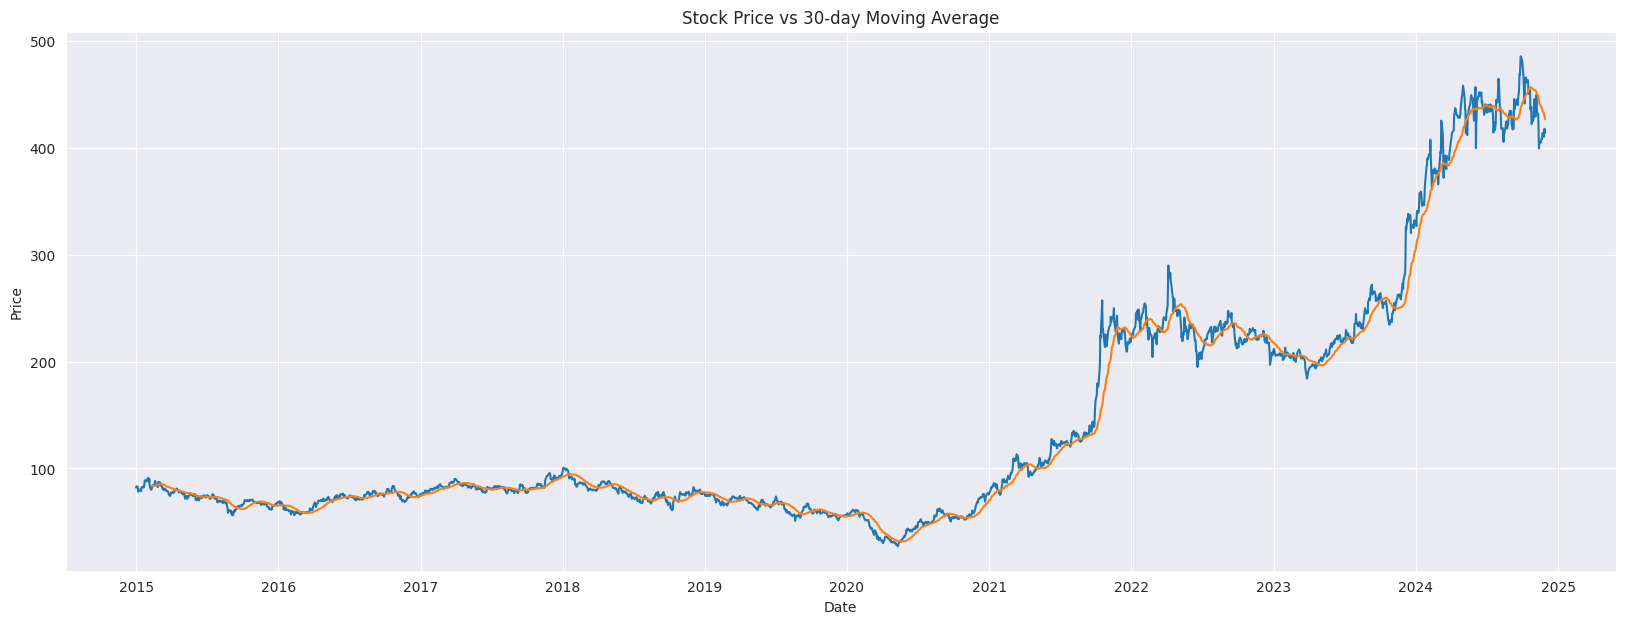

In [31]:
plt.figure(figsize=(20,7))
plt.plot(tatapower_ma['Close'],label='Original data')
plt.plot(tatapower_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

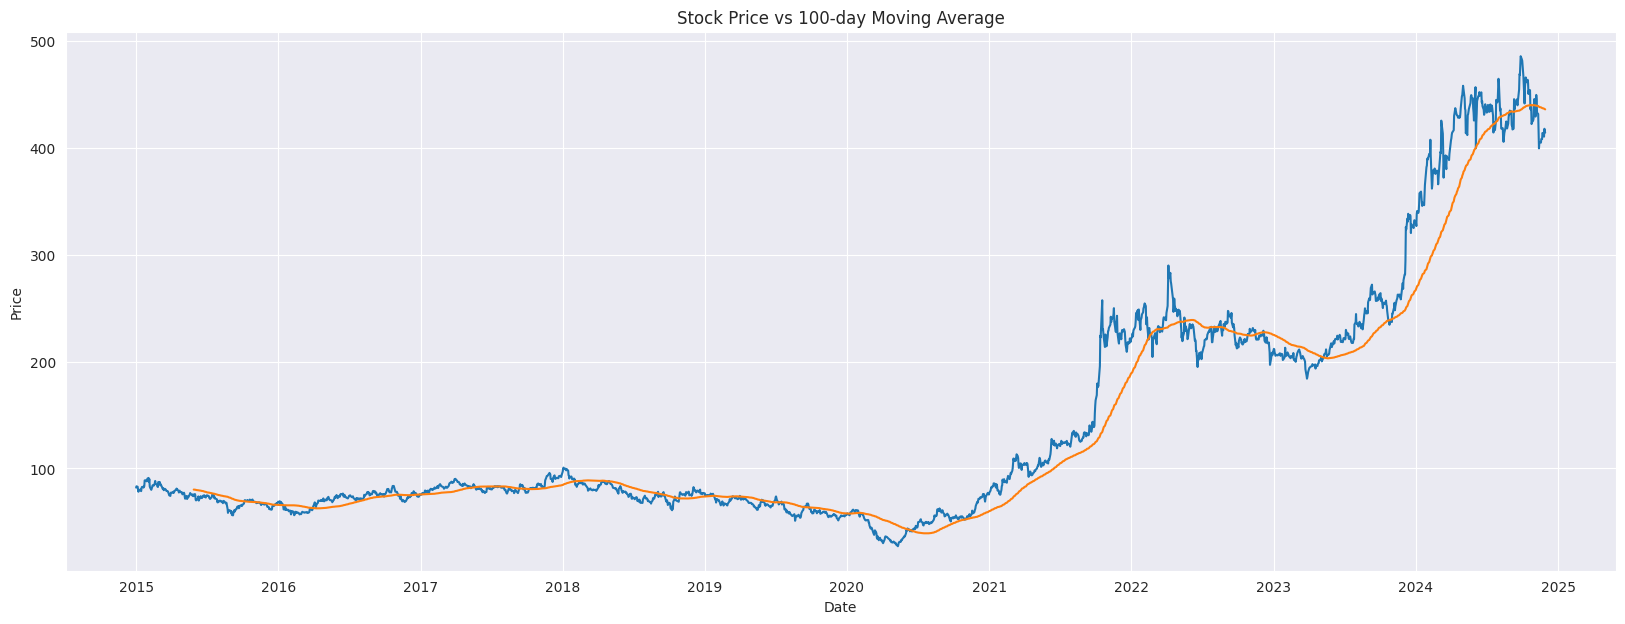

In [32]:
plt.figure(figsize=(20,7))
plt.plot(tatapower_ma['Close'],label='Original data')
plt.plot(tatapower_ma['100-day MA'],label='100-MA')
plt.legend
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs
- In long term, Stock price is in upward trend
- Short term trends can be identified from MA-30 chart
- Stock had a major short term downtrend during the year 2020
- It may be due to the bearish market during the Covid-19 outbraek

## Model Building

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px

In [34]:
tatapower

Price,Close,High,Low,Open,Volume
Ticker,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS,TATAPOWER.NS
Date,,,,,
2015-01-01 00:00:00+00:00,82.150002,82.650002,81.949997,82.199997,938370
2015-01-02 00:00:00+00:00,83.349998,83.750000,82.250000,82.250000,2387959
2015-01-05 00:00:00+00:00,82.849998,84.599998,82.699997,84.099998,1932062
2015-01-06 00:00:00+00:00,79.650002,82.300003,79.500000,82.000000,3509161
2015-01-07 00:00:00+00:00,78.250000,80.199997,78.000000,79.500000,6050723
...,...,...,...,...,...
2024-11-25 00:00:00+00:00,412.350006,423.450012,410.000000,421.450012,20232580
2024-11-26 00:00:00+00:00,410.299988,415.399994,408.000000,413.899994,7286324


In [35]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(tatapower['Close'])
close_df

Ticker,TATAPOWER.NS
Date,
2015-01-01 00:00:00+00:00,82.150002
2015-01-02 00:00:00+00:00,83.349998
2015-01-05 00:00:00+00:00,82.849998
2015-01-06 00:00:00+00:00,79.650002
2015-01-07 00:00:00+00:00,78.250000
...,...
2024-11-25 00:00:00+00:00,412.350006
2024-11-26 00:00:00+00:00,410.299988
2024-11-27 00:00:00+00:00,417.649994


In [36]:
print(close_df.shape)

(2446, 1)


In [37]:
close_df=close_df.reset_index()

In [38]:
close_df['Date']

,Date
0,2015-01-01 00:00:00+00:00
1,2015-01-02 00:00:00+00:00
2,2015-01-05 00:00:00+00:00
3,2015-01-06 00:00:00+00:00
4,2015-01-07 00:00:00+00:00
...,...
2441,2024-11-25 00:00:00+00:00
2442,2024-11-26 00:00:00+00:00
2443,2024-11-27 00:00:00+00:00
2444,2024-11-28 00:00:00+00:00


### Normalizing / scaling close value between 0 to 1

In [39]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(2446, 1)


### Split data for training and testing
- Ratio for training and testing data is 86:14

In [40]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2103, 1)
test_data:  (343, 1)


### Create new dataset according to requirement of time-series prediction

In [41]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2089, 13)
y_train:  (2089,)
X_test:  (329, 13)
y_test (329,)


## Algorithms

## Support vector regression - SVR

In [43]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [44]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2089, 1)
Test data prediction: (329, 1)


In [45]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [46]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  32.44508106860241
Train data MSE:  1052.6832855481828
Test data MAE:  31.363701572511612
-------------------------------------------------------------------------------------
Test data RMSE:  23.205262627262677
Test data MSE:  538.4842136002339
Test data MAE:  19.344127252876355


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [47]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9795508879809953
Test data explained variance regression score: 0.9399590186592919


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [48]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.7322130631859491
Test data R2 score: 0.913740740798848


### Comparision between original stock close price vs predicted close price

In [105]:
import numpy as np
import pandas as pd
import plotly.express as px
from itertools import cycle

# Rename the column for ease of use
close_stock.rename(columns={'TATAPOWER.NS': 'Close'}, inplace=True)

# Assume time_step is defined
look_back = time_step  # Define this value earlier in your script

# Initialize train prediction array for plotting
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Initialize test prediction array for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(closedf) - 1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

# Define column names for the plot
names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])

# Create a DataFrame for plotting
plotdf = pd.DataFrame({
    'Date': close_stock['Date'],
    'original_close': close_stock['Close'],  # Standardized to 'Close'
    'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
    'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()
})

# Create the plot
fig = px.line(
    plotdf,
    x=plotdf['Date'],
    y=[
        plotdf['original_close'],
        plotdf['train_predicted_close'],
        plotdf['test_predicted_close']
    ],
    labels={'value': 'Stock price', 'Date': 'Date'}
)
fig.update_layout(
    title_text='Comparison between original close price vs predicted close price',
    plot_bgcolor='white',
    font_size=15,
    font_color='black',
    legend_title_text='Close Price'
)
fig.for_each_trace(lambda t: t.update(name=next(names)))

# Remove grid lines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Display the plot
fig.show()

Train predicted data:  (2446, 1)
Test predicted data:  (2446, 1)


### Predicting next 30 days

In [108]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [109]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [110]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [111]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [114]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (2089, 13, 1)
Shape of y_train: (2089,)


In [115]:
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the last dimension

In [116]:
y_train = y_train.ravel()  # Convert to 1D array

In [117]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [120]:
# Reshape X_test if necessary
if X_test.ndim == 3:
    X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten the 3D array to 2D

# Make predictions
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

# Reshape predictions to 2D if needed
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Output the shapes of predictions
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2089, 1)
Test data prediction: (329, 1)


In [121]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [122]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.2234879790811277
Train data MSE:  1.496922834956022
Test data MAE:  0.6823893985319203
-------------------------------------------------------------------------------------
Test data RMSE:  122.04357715580154
Test data MSE:  14894.634724984084
Test data MAE:  102.15289013940873


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [123]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.999619307910745
Test data explained variance regression score: 0.27324735236710407


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [124]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9996192051435384
Test data R2 score: -1.3859569602957862


### Comparision between original stock close price vs predicted close price

In [125]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2446, 1)
Test predicted data:  (2446, 1)


### Predicting next 30 days

In [126]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [127]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [128]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [129]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [130]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [131]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2089, 1)
Test data prediction: (329, 1)


In [132]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [133]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.560070331730242
Train data MSE:  12.674100766865877
Test data MAE:  2.045621793777641
-------------------------------------------------------------------------------------
Test data RMSE:  140.1667014526157
Test data MSE:  19646.7041961067
Test data MAE:  119.02396395141233


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [134]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9967939871978314
Test data explained variance regression score: 0.11821884183699072


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [135]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.996775897681833
Test data R2 score: -2.1471863183689655


### Comparision between original stock close price vs predicted close price

In [136]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2446, 1)
Test predicted data:  (2446, 1)


### Predicting next 30 days

In [137]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [138]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [139]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [140]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### LSTM

In [141]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2089, 13, 1)
X_test:  (329, 13, 1)


### LSTM model structure

In [142]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [143]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 13, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 13, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0181 - val_loss: 0.0023
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.7399e-04 - val_loss: 0.0013
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.4861e-04 - val_loss: 0.0033
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.0812e-04 - val_loss: 0.0046
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2083e-04 - val_loss: 0.0086
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.5804e-04 - val_loss: 0.0073
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4776e-04 - val_loss: 0.0150
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.7006e-04 - val_loss: 0.0081
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5472e-04 - val_loss: 0.0103
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.2696e-04 - val_loss: 0.0113
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3228e-04 - val_loss: 0.0124
Epoch 12/100

In [145]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


((2089, 1), (329, 1))

In [146]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [147]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.4552650976784482
Train data MSE:  11.938856895234856
Test data MAE:  2.4762955561044855
-------------------------------------------------------------------------------------
Test data RMSE:  26.374020700074748
Test data MSE:  695.5889678879713
Test data MAE:  22.091100397081


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [148]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9978283536647402
Test data explained variance regression score: 0.9643932043315097


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [149]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9969629327634176
Test data R2 score: 0.8885742839565312


### Comparision between original stock close price vs predicted close price

In [150]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2446, 1)
Test predicted data:  (2446, 1)


### Predicting next 30 days

In [151]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [152]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [153]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [154]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [155]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2089, 13, 1)
X_test:  (329, 13, 1)


In [156]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [157]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 13, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 13, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 13, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 0.0091 - val_loss: 0.0024
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0373e-04 - val_loss: 0.0018
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8614e-04 - val_loss: 0.0027
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.1765e-04 - val_loss: 0.0021
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.4138e-04 - val_loss: 0.0030
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.4293e-04 - val_loss: 0.0014
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.5952e-04 - val_loss: 0.0010
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.3708e-04 - val_loss: 0.0020
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.0554e-04 - val_loss: 0.0020
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.2885e-04 - val_loss: 0.0023
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.0279e-04 - val_loss: 0.0015
Epoch 12/10

In [159]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


((2089, 1), (329, 1))

In [160]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [161]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.4932718499228432
Train data MSE:  12.202948217463362
Test data MAE:  2.52137363373577
-------------------------------------------------------------------------------------
Test data RMSE:  19.417016097378227
Test data MSE:  377.0205141258451
Test data MAE:  15.633247352298632


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [162]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9979052738856065
Test data explained variance regression score: 0.9705390391776296


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [163]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9968957518675208
Test data R2 score: 0.9396054528048309


### Comparision between original stock close price vs predicted close price

In [164]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2446, 1)
Test predicted data:  (2446, 1)


In [165]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-01-01 00:00:00+00:00,82.150002,NaN,NaN
1,2015-01-02 00:00:00+00:00,83.349998,NaN,NaN
2,2015-01-05 00:00:00+00:00,82.849998,NaN,NaN
3,2015-01-06 00:00:00+00:00,79.650002,NaN,NaN
4,2015-01-07 00:00:00+00:00,78.250000,NaN,NaN
...,...,...,...,...
95,2015-05-25 00:00:00+00:00,74.800003,77.784187,NaN
96,2015-05-26 00:00:00+00:00,75.099998,76.800819,NaN
97,2015-05-27 00:00:00+00:00,75.849998,76.786171,NaN
98,2015-05-28 00:00:00+00:00,74.099998,77.470467,NaN


### Predicting next 30 days

In [166]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [167]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [168]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [169]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [170]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,82.150002,82.150002,82.150002,82.150002,82.150002
1,83.349998,83.349998,83.349998,83.349998,83.349998
2,82.849998,82.849998,82.849998,82.849998,82.849998
3,79.650002,79.650002,79.650002,79.650002,79.650002
4,78.250000,78.250000,78.250000,78.250000,78.250000
...,...,...,...,...,...
2471,354.906103,240.794501,220.457693,223.202817,291.494248
2472,354.020381,241.246001,219.103848,221.246937,291.031794
2473,353.173858,241.294501,219.903847,219.387164,290.614211
2474,352.361049,241.179501,220.053846,217.616956,290.236775


### Conclusion Chart

In [171]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [174]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.732213,0.913741
1,Random Forest,0.999619,-1.385957
2,KNN,0.996776,-2.147186
3,LSTM,0.996963,0.888574
4,GRU,0.996896,0.939605


# **Conclusion**

This project focused on analyzing share market trends and building predictive models to forecast stock prices. Here we took example of TATA Power Share data. By leveraging historical stock data and advanced machine learning techniques, several models were trained and evaluated to identify the most suitable one for deployment.

The analysis revealed the following key insights:
1. **Model Performance**:
   - The **GRU model** emerged as the top performer, achieving an excellent balance between training accuracy (R² = 0.996896) and generalization capability (Test R² = 0.939605).
   - The **SVR model** demonstrated strong generalization (Test R² = 0.913741) despite a moderate training score, making it a reliable lightweight alternative.

2. **Overfitting Challenges**:
   - Models like Random Forest and KNN exhibited severe overfitting, with high training scores but poor test performance. This highlighted the need for careful hyperparameter tuning and model selection in stock price prediction.

3. **Deep Learning Strengths**:
   - Deep learning models such as **LSTM** and **GRU** proved effective at capturing the sequential nature of stock price data, yielding competitive results compared to traditional machine learning models.

**Outcome**:
The GRU model was selected as the primary candidate for deployment due to its superior performance in both training and test scenarios, ensuring robust predictions for unseen data.

**Future Scope**:
To further enhance the model's predictive capabilities, future work could include:
- Incorporating additional features such as macroeconomic indicators, sentiment analysis, and technical indicators.
- Experimenting with ensemble techniques to combine the strengths of multiple models.
- Deploying the model in a real-time environment and integrating it with a visualization dashboard for end-user accessibility.

This project underscores the power of machine learning and deep learning in solving complex real-world problems like stock market prediction, paving the way for data-driven investment strategies.